#Bangaluru House Price - Kaggle dataset

## **Dataset:** https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [1]:
#upload kaggle.json
from google.colab import files
files.upload()
print('Uploaded')

Saving kaggle.json to kaggle.json
Uploaded


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d amitabhajoy/bengaluru-house-price-data

  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 50.3MB/s]


In [4]:
!unzip /content/bengaluru-house-price-data.zip -d kaggle

Archive:  /content/bengaluru-house-price-data.zip
  inflating: kaggle/Bengaluru_House_Data.csv  


##Start of Code


In [5]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("/content/kaggle/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.shape

(13320, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
for obj in catg:
  print("{} sets {}".format(obj,set(df[obj])))

area_type sets {'Plot  Area', 'Built-up  Area', 'Super built-up  Area', 'Carpet  Area'}
location sets {nan, 'Shree Ananth Nagar Layout', 'Langford Gardens', '1st Block HRBR Layout', 'Balagere', 'BTM 4th Stage', 'sarjapura main road', 'Ramanjaneyanagar', 'Banashankari 6th stage , 2nd block', 'Udaya Nagar', 'Pattanagere', 'Chaitanya Ananya', 'Nagaraja Garden', ' Bhoganhalli', 'Michael Palaya', 'Achins Road', 'Domlur', 'Kothannur', 'Thanisandra', 'Attiguppe', 'Laxmi Sagar Layout', 'Syndicate Bank Colony', 'Huskur', 'Sarvabhouma Nagar', 'Murugeshpalya', 'Kanakapura Main Road', 'Devi Nagar', 'Sanjeevini Nagar', 'Sadhguru Layout', 'Teachers Colony', 'Bilal Nagar', 'Kyalasanahalli', 'frazertown', 'Sanne Amanikere', 'IVC Road', 'Immadihalli', 'Sabari Nagar', 'NRI Layout', '4th Block HBR Layout', 'GKW Layout', 'Sathya Layout', '3rd Block Hrbr Layout', 'Dodda Nekkundi Extension', 'Hosakerehalli', 'ITI Employees Layout', 'Rahat Bagh', 'High grounds', 'KSRTC Layout', 'Anand nagar', 'Kodbisanhalli'

In [15]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [16]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

##Drop features that are not required to build our model

In [17]:
df1 = df.drop(['area_type','society','balcony','availability'],axis='columns')
df1.shape

(13320, 5)

##Data Cleaning: Handle NA values

In [19]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [22]:
bath_m = df1.bath.median()
bath_m

2.0

In [23]:
df1['bath'].fillna(value= bath_m, inplace = True)
df1.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 40., 15., 13., 18.])

In [24]:
df2 = df1.dropna()

In [25]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [26]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
df2.shape

(13303, 5)

##Feature Engineering

Add new feature(integer) for bhk

In [28]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [29]:
df2[['bhk', 'suffx']] = df2['size'].str.split(' ', 1, expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
df2.head()

,location,size,total_sqft,bath,price,bhk,suffx
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,BHK
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,Bedroom
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,BHK
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,BHK
4,Kothanur,2 BHK,1200,2.0,51.00,2,BHK


total_sqft feature

In [35]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [36]:
# converting total_sqft  into a float using funtion
def convertRange(x):
    temp = x.split('-')
    if len(temp)==2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except :
        return None

In [37]:
df2['total_sqft'] = df2['total_sqft'].apply(convertRange)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

Add new feature called "price per square feet"

In [39]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,BHK,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,Bedroom,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,BHK,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,BHK,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,BHK,4250.000000


In [40]:
df2['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [41]:
df2_stats = df2['price_per_sqft'].describe()
df2_stats

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Examine locations which is a categorical variable.

In [42]:
df2['location'] = df2['location'].apply(lambda x : x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Whitefield                        540
Sarjapur  Road                    397
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [43]:
location_stats.values.sum()

13303

In [44]:
len(location_stats[location_stats>10])

241

In [45]:
len(location_stats)

1293

In [46]:
len(location_stats[location_stats<=10])

1052

In [47]:
df3 = df2.loc[:]

##Dimensionality Reduction

In [48]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [50]:
len(df3.location.unique())

1293

In [51]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

242

In [53]:
df3.head(20)

,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,BHK,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,Bedroom,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,BHK,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,BHK,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,BHK,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,BHK,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,BHK,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,BHK,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,BHK,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,Bedroom,36274.509804


##Outlier Removal Using Logic

Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.

In [54]:
df4 = df3.loc[:]

In [57]:
df4.bhk = df4.bhk.astype(float)

In [58]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,Bedroom,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,Bedroom,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,Bedroom,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,Bedroom,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,Bedroom,20000.000000


In [59]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12559, 8)

##Outlier Removal Using Standard Deviation and Mean

In [60]:
df5.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [62]:
def remove_pps_outliers(datf):
    df_out = pd.DataFrame()
    for key, subdf in datf.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [63]:
df6 = remove_pps_outliers(df5)
df6.shape

(10286, 8)

In [64]:
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [65]:
def plot_scatter_chart(df0,location):
    bhk2 = df0[(df0.location==location) & (df0.bhk==2)]
    bhk3 = df0[(df0.location==location) & (df0.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()   

In [112]:
locations = df6.location.unique()

In [113]:
locations

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

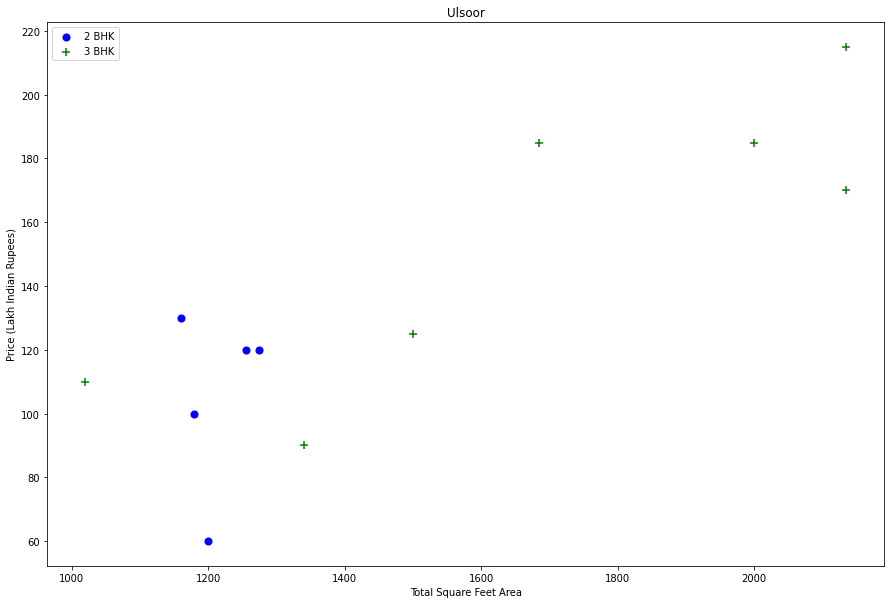

In [70]:
plot_scatter_chart(df6,"Ulsoor")

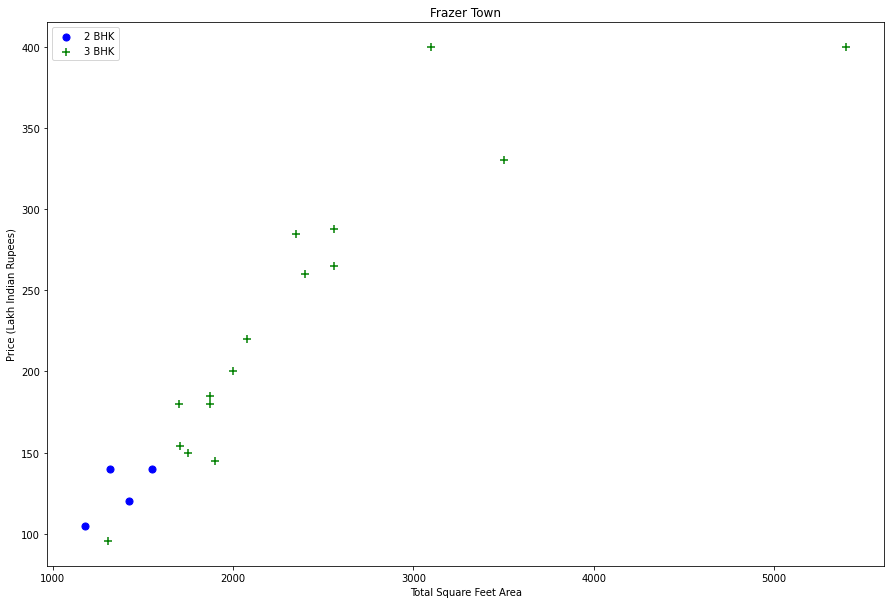

In [71]:
plot_scatter_chart(df6,"Frazer Town")

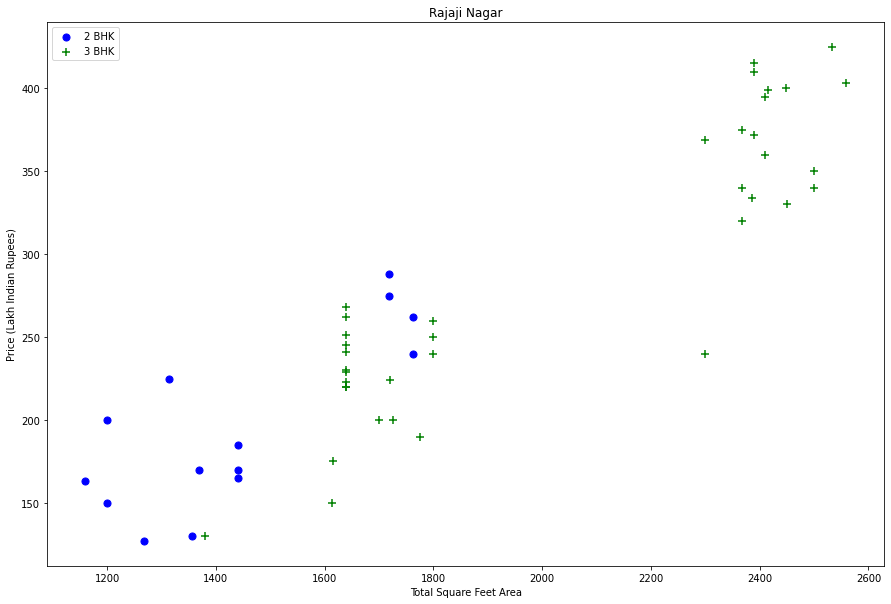

In [79]:
plot_scatter_chart(df6,"Rajaji Nagar")

we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [73]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [74]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7353, 8)

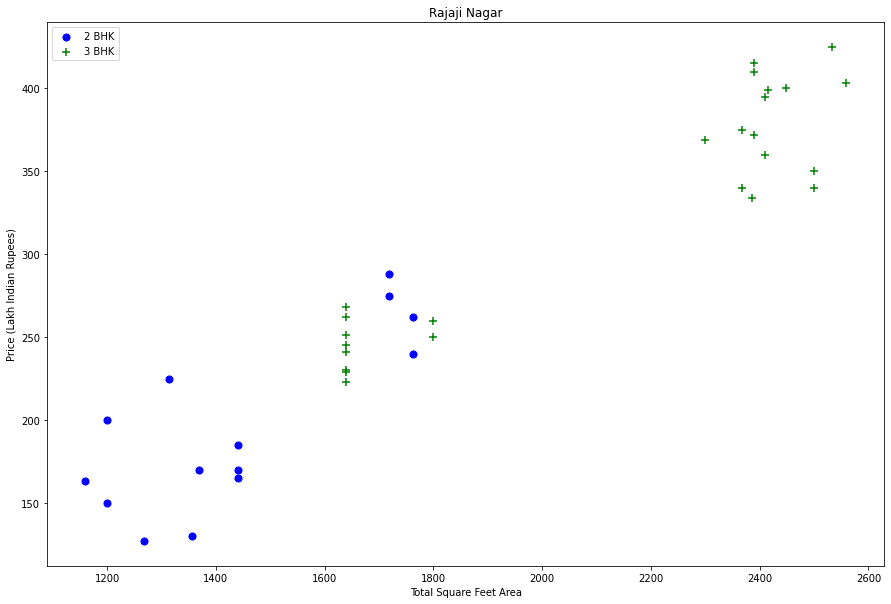

In [80]:
plot_scatter_chart(df7,"Rajaji Nagar")

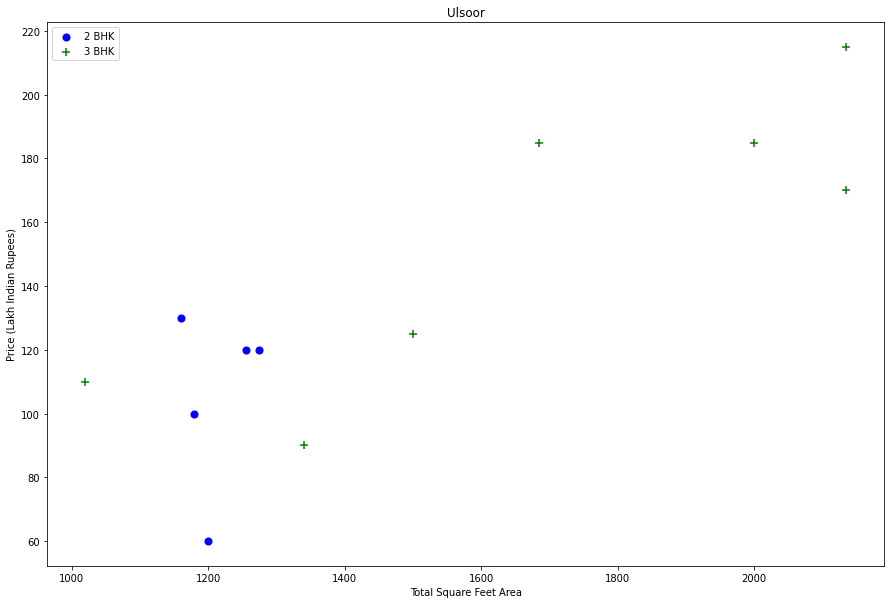

In [77]:
plot_scatter_chart(df7,"Ulsoor")

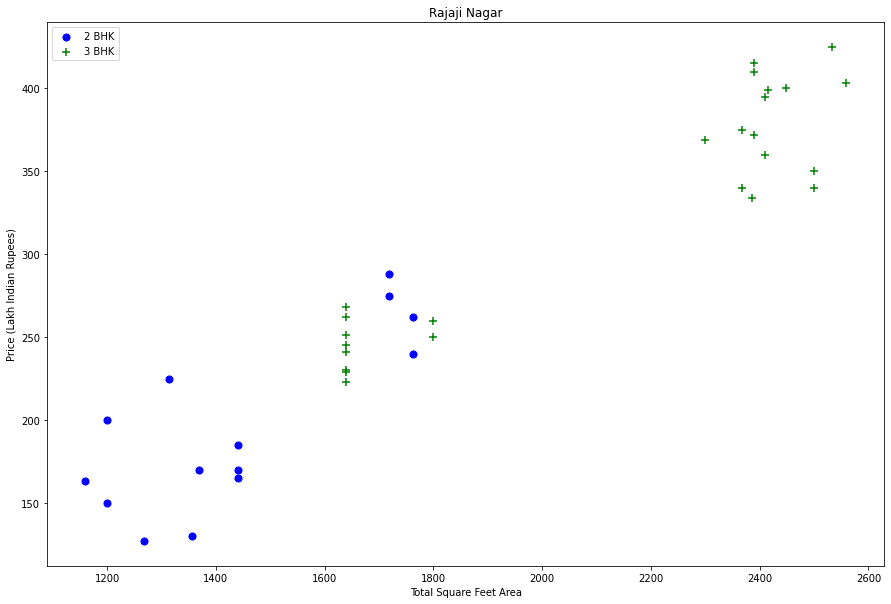

In [78]:
plot_scatter_chart(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

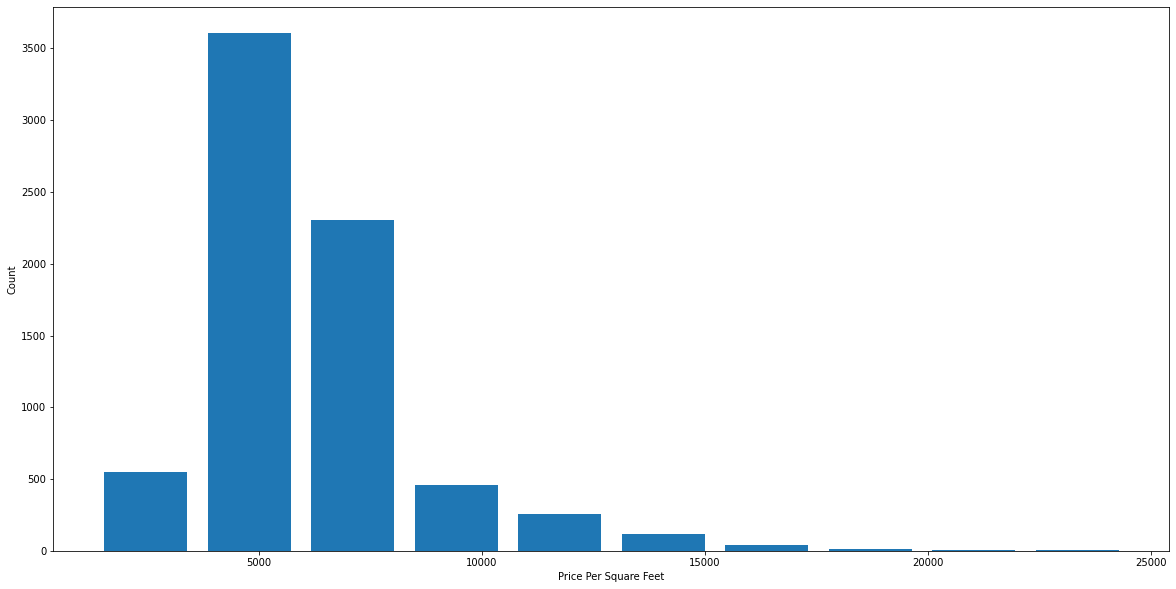

In [82]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

##Outlier Removal Using Bathrooms Feature

In [83]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [84]:
df8= df7.copy()

Text(0, 0.5, 'Count')

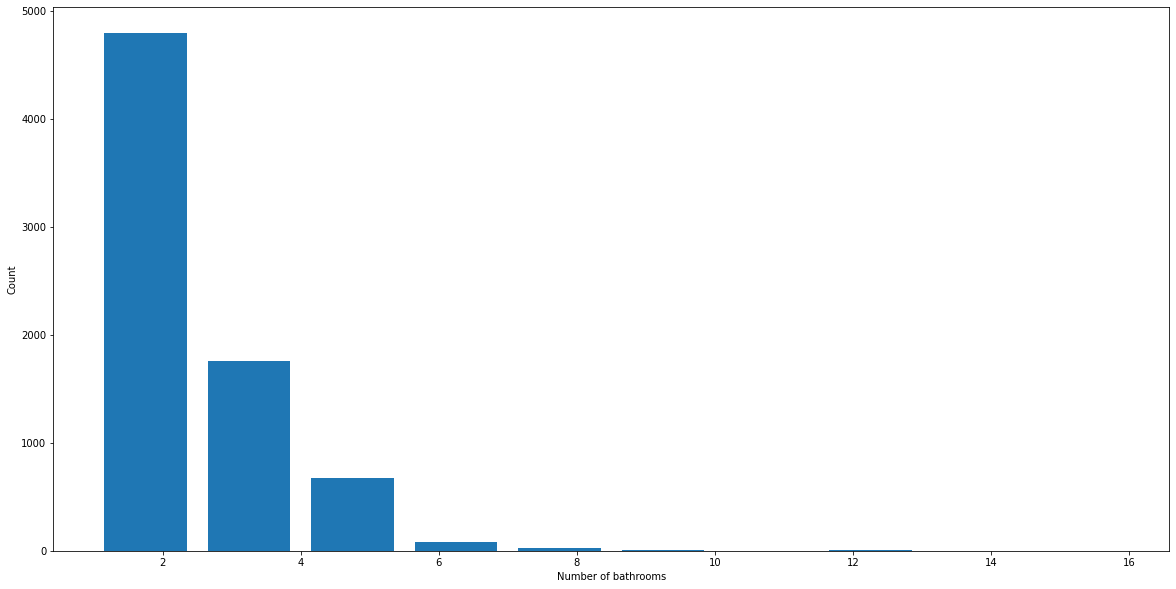

In [85]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [86]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,BHK,4000.000000
8530,other,10 BHK,12000.0,12.0,525.0,10.0,BHK,4375.000000
8619,other,16 BHK,10000.0,16.0,550.0,16.0,BHK,5500.000000
9352,other,11 BHK,6000.0,12.0,150.0,11.0,BHK,2500.000000
9683,other,13 BHK,5425.0,13.0,275.0,13.0,BHK,5069.124424


In [87]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,Bedroom,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,Bedroom,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,BHK,6423.034330
8455,other,6 BHK,11338.0,9.0,1000.0,6.0,BHK,8819.897689


 total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed


In [88]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7275, 8)

In [90]:
df9.head()

,location,size,total_sqft,bath,price,bhk,suffx,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,BHK,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,BHK,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,BHK,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,BHK,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,BHK,11983.805668


##Drop columns which are unwanted now


In [91]:
df10 = df9.drop(['size','suffx','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0


##Use One Hot Encoding For Location


In [92]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Build a Model 

In [96]:
df12.shape

(7275, 245)

In [97]:
X = df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X.shape

(7275, 244)

In [99]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [103]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8419514786233459

In [105]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80702643, 0.77249195, 0.86466289, 0.83528873, 0.81806721])

##Test the model for few properties

In [106]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [107]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


88.4053471195787

In [108]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


184.8063914689708

In [110]:
predict_price('Frazer Town',1200, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


138.5731419366873

In [111]:
predict_price('HBR Layout',1200, 2, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


83.25691524744283

In [114]:
locations

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'